# Plagiarism Detection

Plagiarism is an increasing problem for education institutions and there are some tools to help in its detection. However testing its effectiveness is a challenge when there is no access to reliable data.

The task of building tools to detect plagiarised work is not straightforward due to the problems of obtaining real examples of plagiarised text. As stated by Clough and Stevenson (2011), among the problems that hamper obtaining reliable plagiarism labelled data are: that plagiarised text is not intended to be identified and plagiarists are very unlikely to admit their act; and that even if a plagiarised text is detected, because of legally and ethics issues, it may not be freely available.

## Containment Calculation

¿What is containment?

It is a measure of text similarity proposed by Andrei Broder in his paper "On the resemblance and containment of documents".
The containment $c(A,B)$ of two documents A and B is a number between 0 and 1 that contains the proportion of A's unique n-grams that are also in B.
Formally, containment is:
\begin{align}
C_n(A,B)=\frac{|S(A,n)\:\cap\:S(B,n)|}{|S(A,n)|}
\end{align}

Where $S(A,n)$ represent the set of n-grams for document A

The numerator represent the intersection of unique n-grams between document A and document B. The denominator equals the number of unique n-grams in document A.

Let's see below and example a containment calculation

In [1]:
import numpy as np
import sklearn
#text examples
text_1="This is a small text to try containment calculation"
text_2="This is another text to try containment calculation but longer"

We first need to count the ocurrences of n-grams in our data. For that purpose, we should use the CountVectorized tool contained in the sklearn package. This tool takes as input the size of n-grams we want to obtain and whether the feature should be made of word or character n-gram

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
#Example of CountVectorizer vocabulary of n=1
n_size=1
cv=CountVectorizer(analyzer='word',ngram_range=(n_size,n_size))
vocabulary=cv.fit([text_1,text_2]).vocabulary_
print(vocabulary)

{'this': 8, 'is': 4, 'small': 6, 'text': 7, 'to': 9, 'try': 10, 'containment': 3, 'calculation': 2, 'another': 0, 'but': 1, 'longer': 5}


In [3]:
#Example of CountVectorizer vocabulary with n=2
n_size=1
cv2=CountVectorizer(analyzer='word',ngram_range=(n_size,n_size))
print(cv2.fit([text_1,text_2]).vocabulary_)

{'this': 8, 'is': 4, 'small': 6, 'text': 7, 'to': 9, 'try': 10, 'containment': 3, 'calculation': 2, 'another': 0, 'but': 1, 'longer': 5}


As we can wee, the countvectorizer vocabulary outputs a mapping (dictionary) where the keys are the n-grams and the values are the indices in the feature matrix. The words in the feature matrix are alphabetically ordered.

In [4]:
#Now let's define a function to calculate containment
def containment_calculation(array):
    vocab_size=sum(array[0])
    containment=sum(array[0]==array[1])/vocab_size
    return containment    

In [5]:
#Let's use the CountVectorizer with n=1 to calculate the containment
n_size=1
cv=CountVectorizer(analyzer='word',ngram_range=(n_size,n_size))
n_grams=cv.fit_transform([text_1,text_2])
n_grams.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]])

In [6]:
print("Continment for n=1: ",containment_calculation(n_grams.toarray()))

Continment for n=1:  0.875


In [7]:
n_size=2
cv=CountVectorizer(analyzer='word',ngram_range=(n_size,n_size))
n_grams=cv.fit_transform([text_1,text_2])
print("Continment for n=2: ",containment_calculation(n_grams.toarray()))

Continment for n=2:  0.7142857142857143


## Data

The dataset to be used in this project is a modified version of the dataset create by Paul Clough and Mark Stevenson. The complete description of the data generation process is described in their [research article](https://link.springer.com/article/10.1007/s10579-009-9112-1) (Clough, P., Stevenson, M. Developing a corpus of plagiarised short answers, 2011)

### Description of the dataset

<li> The dataset contains several txt files whose characteristics are summarized in the file_information.csv file. </li>
<li> The dataset has 100 files, out of which 5 are the original answers. Therefore, the participants contributed with 95 anwers, divided in 5 tasks and 5 plagiarism methods. </li>
<li> The <b>File</b> column in the file_information.csv file contains the name of the txt file. </li>
<li> The <b>Task</b> column contains one of the five learning task (A-E) that each txt answers. </li>
<li> The <b>Category</b> column indicates if the participant was asked to use a Near copy (cut), Light revision (light), Heavy revision (heavy) or Non-plagiarised (non) method to answer the question. This column also contains the 'orig' category to reference the original texts on which participants based their answers</li>

>For more details in the above mentioned points, please refer to the research document (pages 9-12)

In [8]:
import pandas as pd
import numpy as np

In [9]:
summary_data=pd.read_csv('./data/file_information.csv')
summary_data

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non
...,...,...,...
95,orig_taska.txt,a,orig
96,orig_taskb.txt,b,orig
97,orig_taskc.txt,c,orig
98,orig_taskd.txt,d,orig


In [10]:
print("\nDistribution among tasks and plagiarism categories:\n")
pd.crosstab(summary_data['Category'],summary_data['Task'],margins=True)


Distribution among tasks and plagiarism categories:



Task,a,b,c,d,e,All
Category,,,,,,
cut,4,3,3,4,5,19
heavy,3,4,5,4,3,19
light,3,3,4,5,4,19
non,9,9,7,6,7,38
orig,1,1,1,1,1,5
All,20,20,20,20,20,100


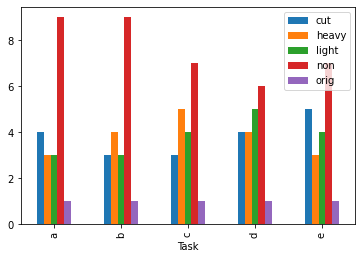

In [11]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
summary_data.groupby(by=['Task','Category']).count().unstack().plot(kind='bar',stacked=False, ax=ax)
ax.legend(['cut','heavy','light','non','orig']);

## Data Preprocessing

1. The first step in the data preprocessing is converting the multiclass variable that indicates plagiarism into a binary class so we can use a binary classification algorithm to classify the texts as either plagiarised or not plagiarised. 

The classes in the Category column can be classified as plagiarism, not plagiarism and original text. As the original text does not form any form of plagiarism, we will classify them as a third category that will be later use to compare the plagiarism text to the original one.

In [12]:
#Our function to transform a 5 class variable into a 3 class variable (plagiarised, non-plagiarised, original)
#takes as input the csv file (route and name) and returns a new dataframe with the category converted to numbers
#and a new column containing the new 3 class variable.
#Is important to mention that the csv provided is assumed to have File, Category and Task columns

def class_to_numbers(csv):
    df=pd.read_csv(csv)
    df['Category']=df['Category'].map({'non':0,'heavy':1,'light':2,'cut':3,'orig':-1})
    df['Class']=df['Category'].map({0:0,1:1,2:1,3:1,-1:-1})
    return df

In [13]:
df=class_to_numbers('data/file_information.csv')
df.head(10)

,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0
5,g0pB_taska.txt,a,0,0
6,g0pB_taskb.txt,b,0,0
7,g0pB_taskc.txt,c,3,1
8,g0pB_taskd.txt,d,2,1
9,g0pB_taske.txt,e,1,1


2. After replacing the labels and dividing our data into plagiarised and non-plagiarised records, we should extract the text in the txt files and include them in the dataset

In [14]:
import re
texts=[]
for i in df['File']:
    with open('data/'+i,'r',encoding='UTF-8',errors='ignore') as f:
        line=f.read()
        line=re.sub(r'[^\w\s]', ' ',line.lower())
        line=line.replace('\n',' ')
        line=line.replace('\t',' ')
        line=line.replace('   ',' ')
        line=line.replace('  ',' ')
        texts.append(line)
        f.close()
df['Text']=texts
del(texts)
df.head()

,File,Task,Category,Class,Text
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...


3. Provided that our data is divided into 5 tasks, it is optimal to implement an stratified random sampling in order to have a similar proportion answers of each task and plagiarism in training and test set. In case we do not use stratified sampling, we may end up with zero observations corresponding to a particular task in our test or training data.

In [15]:
import operator
def sampling(data_frame,operator,sampling,seed):
    #The function first retrieves from the original dataset the rows that contain rows that meet certain criteria.
    #The criteria of the Category row being greater than zero retrieves the plagiarised answers, and Category equal to zero
    #retrieves the non-plagiarised data
    df1=data_frame[operator(df['Category'],0)]
    
    #We then obtain a sratified subsample. Using sample after a grouped dataframe allows us to retrieve the same quantity of observation
    #in each sub group.
    index_stratified=df1.groupby(by=['Task','Category'],group_keys=False).apply(lambda x: x.sample(min(len(x), sampling),random_state=seed)).index
    data_frame.iloc[index_stratified,list(data_frame.columns).index('Datatype')]=2
    data_frame.iloc[df1.index.difference(index_stratified),list(data_frame.columns).index('Datatype')]=1    

In [16]:
def train_test_dataframe(df, seed=100):
    new_df = df.copy()
    new_df.loc[:,'Datatype'] = 0
    sampling(new_df, operator.gt,1, seed)
    sampling(new_df, operator.eq,2, seed)
    mapping = {0:'orig', 1:'train', 2:'test'} 
    new_df.Datatype = [mapping[item] for item in new_df.Datatype] 
    return new_df

In [17]:
df = train_test_dataframe(df, seed=1)
df

,File,Task,Category,Class,Text,Datatype
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...,train
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...,test
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...,train
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...,train
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...,train
...,...,...,...,...,...,...
95,orig_taska.txt,a,-1,-1,in object oriented programming inheritance is ...,orig
96,orig_taskb.txt,b,-1,-1,pagerank is a link analysis algorithm used by ...,orig
97,orig_taskc.txt,c,-1,-1,vector space model or term vector model is an ...,orig
98,orig_taskd.txt,d,-1,-1,in probability theory bayes theorem often call...,orig


In [18]:
#We can see below that we obtained similar amount of training and test observations for each task.
for i in ['a','b','c','d','e']:
    print('Distribution of train/test observations for task '+i+': ')
    print(df[df.Task==i].Datatype.value_counts())
    print('\n')

Distribution of train/test observations for task a: 
train    14
test      5
orig      1
Name: Datatype, dtype: int64


Distribution of train/test observations for task b: 
train    14
test      5
orig      1
Name: Datatype, dtype: int64


Distribution of train/test observations for task c: 
train    14
test      5
orig      1
Name: Datatype, dtype: int64


Distribution of train/test observations for task d: 
train    14
test      5
orig      1
Name: Datatype, dtype: int64


Distribution of train/test observations for task e: 
train    14
test      5
orig      1
Name: Datatype, dtype: int64




In [19]:
#We can see below that we obtained the same proportion of train/test observations for each category.
for i in [0,1,2,3,-1]:
    print('Distribution of train/test observations for Category '+str(i)+': ')
    print(df[df.Category==i].Datatype.value_counts())
    print('\n')

Distribution of train/test observations for Category 0: 
train    28
test     10
Name: Datatype, dtype: int64


Distribution of train/test observations for Category 1: 
train    14
test      5
Name: Datatype, dtype: int64


Distribution of train/test observations for Category 2: 
train    14
test      5
Name: Datatype, dtype: int64


Distribution of train/test observations for Category 3: 
train    14
test      5
Name: Datatype, dtype: int64


Distribution of train/test observations for Category -1: 
orig    5
Name: Datatype, dtype: int64




## Calculating similarity features for estimation

### Containment

We will begin by calculating the Containment measure.
It is worth noting that in casa same n-gram is repeated in the answer text it should be counted as many times as it appears to calculate the size of the answer text (so the length of the text is not the number of unique n-grams, but the sum of the ocurrences of each n-gram).

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
def containment(df, n, answer_filename):
    task=df[df.File==answer_filename].Task.values[0]
    source_text=df[(df.Task==task) & (df.Datatype=='orig')].Text.values[0]
    answer_text=df[df.File==answer_filename].Text.values[0]
    cv=CountVectorizer(ngram_range=(n,n),analyzer='word')
    n_grams=cv.fit_transform([answer_text,source_text]).toarray()
    vocab_size=sum(n_grams[0])
    intersection=sum(np.minimum(n_grams[0], n_grams[1]))
    containment=intersection/vocab_size
    
    return containment

Let's test the containment calculation for different categories to confirm that the resulting value is higher in texts with more literal plagiarism. 

We will use a 4-gram. As n increases, the likelihood of obtaining higher containment even if the text is not plagiarised, decreases. This happens because certain topics need some unique words to be explained correctly.

In [21]:
n = 4
test_indices = range(5)
category = []
containment_values = []
for i in test_indices:
    category.append(df.loc[i, 'Category'])
    filename = df.loc[i, 'File']
    c = containment(df, n, filename)
    containment_values.append(c)

print('Original category values: \n', category)
print()
print(str(n)+'-gram containment values: \n', containment_values)

Original category values: 
 [0, 3, 2, 1, 0]

4-gram containment values: 
 [0.0, 0.9432989690721649, 0.5159817351598174, 0.10869565217391304, 0.005319148936170213]


As expected, the category 0 (non-plagiarised) has a containment very close to zero. The value of the calculation increases as the category goes from less plagiarised to near-copy plagiarism

### Longest Common Subsequence

Even though containment is a good measure of similarity between texts; as n becomes larger, it tends to identify a copy-paste type of plagiarism. Because order matters and n-grams consider only consecutive words, we need another measure of similarity where consecutiveness is nos strictly encouraged.

The best way to calculate the LCS is using Dynamic Programming

In [22]:
def lcs_calculation(answer_text, source_text):
    '''Computes the longest common subsequence of words in two texts; returns a normalized value.
       :param answer_text: The pre-processed text for an answer text
       :param source_text: The pre-processed text for an answer's associated source text
       :return: A normalized LCS value'''

    answer_text_list=[x for x in answer_text.split(' ') if x!='']
    source_text_list=[x for x in source_text.split(' ') if x!='']
    matrix=np.zeros((len(answer_text_list)+1,len(source_text_list)+1))
    for i in range(matrix.shape[0]-1):
        for j in range(matrix.shape[1]-1):
            if answer_text_list[i]==source_text_list[j]:
                matrix[i+1,j+1]=matrix[i,j]+1
            else:
                 matrix[i+1,j+1]=max(matrix[i+1,j],matrix[i,j+1])
    
    return matrix[i+1,j+1]/len(answer_text_list)

As with Containment, let's test the LCS calculation to see how it behaves for different kind of plagiarism

In [23]:
df.loc[(df.Task=='a') & (df.Class==-1),'Text']

95    in object oriented programming inheritance is ...
Name: Text, dtype: object

In [24]:
test_indices = range(5)
category = []
lcs_values = []
for i in test_indices:
    category.append(df.loc[i, 'Category'])
    task=df.loc[i, 'Task']
    answer_text = df.loc[i, 'Text']
    source_text = df.loc[(df.Task==task) & (df.Class==-1),'Text'].values[0]
    lcs = lcs_calculation(answer_text, source_text)
    lcs_values.append(lcs)

print('Original category values: \n', category)
print()
print('LCS values: \n', lcs_values)

Original category values: 
 [0, 3, 2, 1, 0]

LCS values: 
 [0.1917808219178082, 0.8207547169811321, 0.8464912280701754, 0.3160621761658031, 0.24257425742574257]


As expected, the LCS values are higher than the Containment values because it also counts sequenses of non-consecutive words. Therefore, non-literal plagiarism can be better detected with LCS.

### Including the features in the final dataset

In [25]:
def create_list_containment(df,n):
    containment_list=[]
    files=list(df['File'])
    classes=list(df['Class'])              
    for i in range(len(files)):
        if classes[i]!=-1:
            containment_list.append(containment(df,n,files[i]))
        else:
            containment_list.append(-1)
    return containment_list  

In [26]:
def create_list_lcs(df):
    lcs_list=[]
    texts=list(df['Text'])
    tasks=list(df['Task'])
    classes=list(df['Class'])
    sources_dict=dict(zip(list(df[df.Class==-1].Task),list(df[df.Class==-1].Text)))                 
    for i in range(len(texts)):
        if classes[i]!=-1:
            lcs_list.append(lcs_calculation(texts[i],sources_dict[tasks[i]]))
        else:
            lcs_list.append(-1)
    return lcs_list  

We can calculate more than one containment depending on the **n** we use, so we could generate more than one feature based on different sizes of n-grams.
For LCS we can only calculate one value.

In [27]:
number_of_n=10
df_features=pd.DataFrame()
for i in range(1,number_of_n+1):
    column_name='containment'+str(i)
    df_features[column_name]=create_list_containment(df,i)
df_features['lcs']=create_list_lcs(df)
df_features

,containment1,containment2,containment3,containment4,containment5,containment6,containment7,containment8,containment9,containment10,lcs
0,0.398148,0.079070,0.009346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191781
1,1.000000,0.984694,0.964103,0.943299,0.922280,0.901042,0.879581,0.857895,0.835979,0.813830,0.820755
2,0.869369,0.719457,0.613636,0.515982,0.449541,0.382488,0.319444,0.265116,0.219626,0.197183,0.846491
3,0.593583,0.268817,0.156757,0.108696,0.081967,0.060440,0.044199,0.027778,0.011173,0.000000,0.316062
4,0.544503,0.115789,0.031746,0.005319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.242574
...,...,...,...,...,...,...,...,...,...,...,...
95,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
96,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
97,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
98,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


### Selecting the least correlated features to predict plagiarism

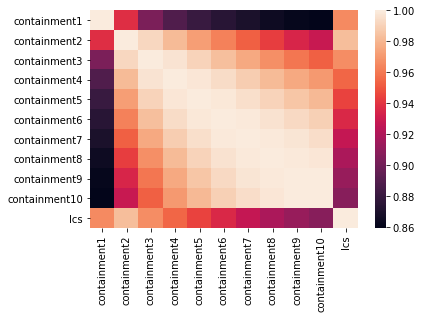

In [28]:
import seaborn as sns
sns.heatmap(df_features.corr());

For feature selection, we should consider a subset that has the lowest possible pairwise correlations. For that purpose, we will create a function that takes as input the inputs we want to have in our estimation anyways, and the correlation cutoff

In [29]:
def select_features(initial_features,correlation_cutoff):
    '''
    Function that calculates the least correlated features based on a corrolation_cutoff
    Arguments:
        initial_features: list of features that we want to have in our estimation anyway. The algorithm will compare correlations with this features and keep the ones that are least correlated
        correlation_cutoff: the correlation cutoff to compare the pairwise correlations and keep only the features below the cutoff.
    '''
    
    features=initial_features
    matrix=df_features.corr().abs().stack().reset_index()
    matrix.columns=['Feature_corr_1','Feature_corr_2','correlation']
    while True:
        value=matrix[matrix.Feature_corr_1.isin(features) & ~matrix.Feature_corr_2.isin(features)].groupby(by='Feature_corr_2').max().sort_values(by='correlation').iloc[0,1]
        index=matrix[matrix.Feature_corr_1.isin(features) & ~matrix.Feature_corr_2.isin(features)].groupby(by='Feature_corr_2').max().sort_values(by='correlation').index[0]
        if value<=correlation_cutoff:
            features.append(index)
        else:
            break
    return features

In [30]:
select_features(['lcs'],0.97)

['lcs', 'containment10', 'containment1', 'containment3']

### Creating the train/test data and converting them to CSV

In [31]:
def train_test_data(complete_df, features_df, selected_features):
    
    merge=complete_df.merge(features_df,left_index=True,right_index=True)
    # get the training features
    train_x = merge.loc[complete_df.Datatype=='train',selected_features].to_numpy()
    # And training class labels (0 or 1)
    train_y = merge.loc[complete_df.Datatype=='train','Class'].to_numpy()
    
    # get the test features and labels
    test_x = merge.loc[complete_df.Datatype=='test',selected_features].to_numpy()
    test_y = merge.loc[complete_df.Datatype=='test','Class'].to_numpy()
    
    return (train_x, train_y), (test_x, test_y)

In [32]:
final_features = select_features(['lcs'],0.97)
(train_x, train_y), (test_x, test_y) = train_test_data(df, df_features,final_features)

In [33]:
import os
def data_to_csv(x,y,file,directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    final_data=pd.concat([pd.DataFrame(y),pd.DataFrame(x)],axis=1)
    path=os.path.join(directory,file)
    final_data.to_csv(path,index=False,header=False) 

In [34]:
data_dir = 'plagiarism_data_mine'
data_to_csv(train_x, train_y, file='train.csv', directory=data_dir)
data_to_csv(test_x, test_y, file='test.csv', directory=data_dir)

<br></br>
## Training our model and deploying it with Amazon Sagemaker
<br></br>

In [35]:
import sagemaker
import boto3
import os

As always, we should first define our Sagemaker session and role:
* Session: The session class provides convenient methods for manipulating entities and resources that Sagemaker uses (i.e training jobs, endpoints, datasets)
* Role: The role contains all the permissions that the user grants to Sagemaker to perform operation on his/her behalf

In [36]:
session=sagemaker.Session()
role=sagemaker.get_execution_role()

In order to use our created datasets with Sagemaker, we should upload them to S3.

In [37]:
client=boto3.client('sagemaker')
default_bucket=session.default_bucket()
prefix='plagiarism_detection'
path='plagiarism_data_mine'

session.upload_data(path=path,key_prefix=prefix,bucket=default_bucket)

's3://sagemaker-us-east-1-095482984955/plagiarism_detection'

Sagemaker has ML built-in algorithms but it is also possible to train a custom sklearn model. In this notebook we will use the latter.

The documentation for using a custom scikit-learn model with Sagemaker Python SDK can be found in the following [link](https://sagemaker.readthedocs.io/en/stable/frameworks/sklearn/using_sklearn.html)

To implement a custom sklearn algorithm, it is necessary to have a script that loads data, configures hyperparameters, trains a model, and saves the model artifacts.

In [39]:
from sagemaker.sklearn.estimator import SKLearn
from custom_sklearn import sklearn_train

In [47]:
%%time

#training the model
estimator=SKLearn(entry_point='custom_sklearn/sklearn_train.py',
                 instance_type='ml.m4.xlarge',
                  framework_version='0.23-1',
                py_version='py3',
                 hyperparameters={'kernel':'poly'},
                 role=role)
estimator.fit({'train':'s3://sagemaker-us-east-1-095482984955/plagiarism_detection/train.csv','test':'s3://sagemaker-us-east-1-095482984955/plagiarism_detection/test.csv'})

2021-03-29 02:37:21 Starting - Starting the training job...ProfilerReport-1616985441: InProgress
...
2021-03-29 02:38:05 Starting - Launching requested ML instances......
2021-03-29 02:39:05 Starting - Preparing the instances for training.........
2021-03-29 02:40:46 Downloading - Downloading input data...
2021-03-29 02:41:21 Training - Training image download completed. Training in progress..2021-03-29 02:41:21,599 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2021-03-29 02:41:21,602 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2021-03-29 02:41:21,617 sagemaker_sklearn_container.training INFO     Invoking user training script.
2021-03-29 02:41:21,978 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2021-03-29 02:41:25,014 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2021-03-29 02:41:25,028 sagemaker-training-toolkit INFO     No GPUs dete

In [48]:
#deploying the model to test
predictor = estimator.deploy(initial_instance_count=1,instance_type='ml.t2.medium')

-------------------!

In [49]:
test_data = pd.read_csv(os.path.join(data_dir, "test.csv"), header=None, names=None)
test_y = test_data.iloc[:,0]
test_x = test_data.iloc[:,1:]

In [50]:
from sklearn.metrics import accuracy_score
test_y_preds = predictor.predict(test_x)
accuracy = accuracy_score(test_y,test_y_preds)
print("Accuracy of the model in the test set: {}".format(accuracy))

Accuracy of the model in the test set: 1.0


In [51]:
predictor.delete_endpoint()
bucket_to_delete = boto3.resource('s3').Bucket(bucket)
bucket_to_delete.objects.all().delete()

NameError: name 'bucket' is not defined